# Anomaly Investigations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Maheep's Investigations

In [ ]:
data = pd.read_csv('anomaly_data.csv')
print(data['timestamp'].head())

0    2024-11-25 10:00:00
1    2024-11-25 10:05:00
2    2024-11-25 10:10:00
3    2024-11-25 15:00:00
4    2024-11-25 15:05:00
Name: timestamp, dtype: object


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
print(data['timestamp'].isna().sum())  # Check for any unparsed values

0


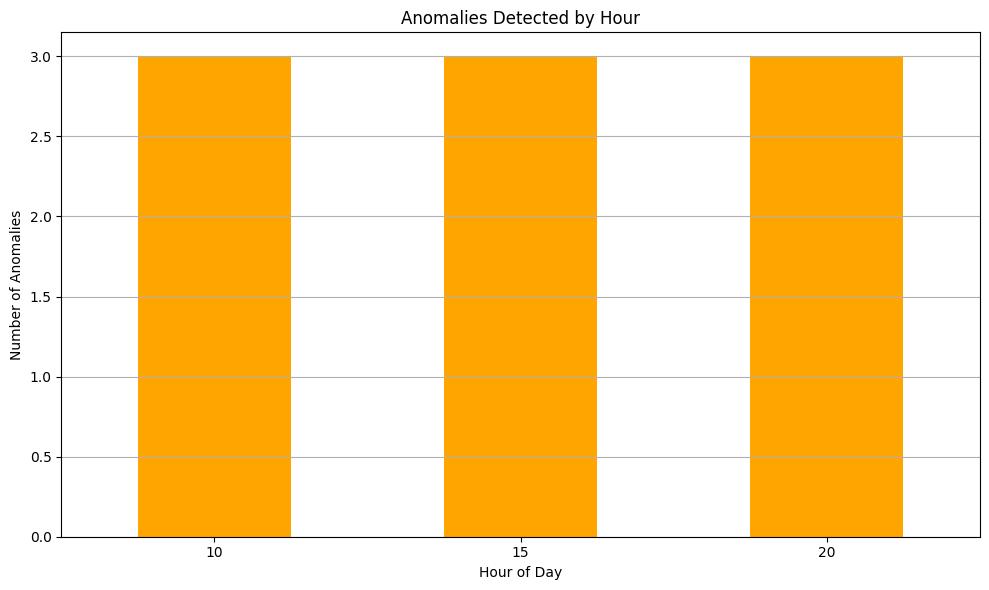

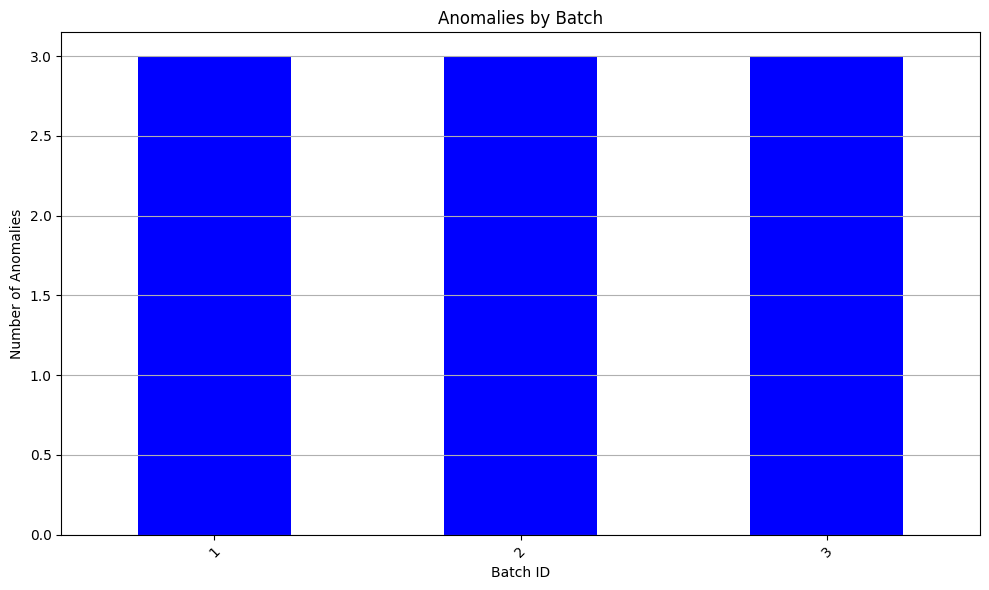

Correlation between anomalies and external events:
              anomaly_flag  event_flag
anomaly_flag           NaN         NaN
event_flag             NaN         1.0


<ipython-input-9-9b330b298d1e>:68: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  anomaly_counts = data.set_index('timestamp').resample('H')['anomaly_flag'].sum()
<ipython-input-9-9b330b298d1e>:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  event_counts = external_events.set_index('event_time').resample('H')['event_type'].count()


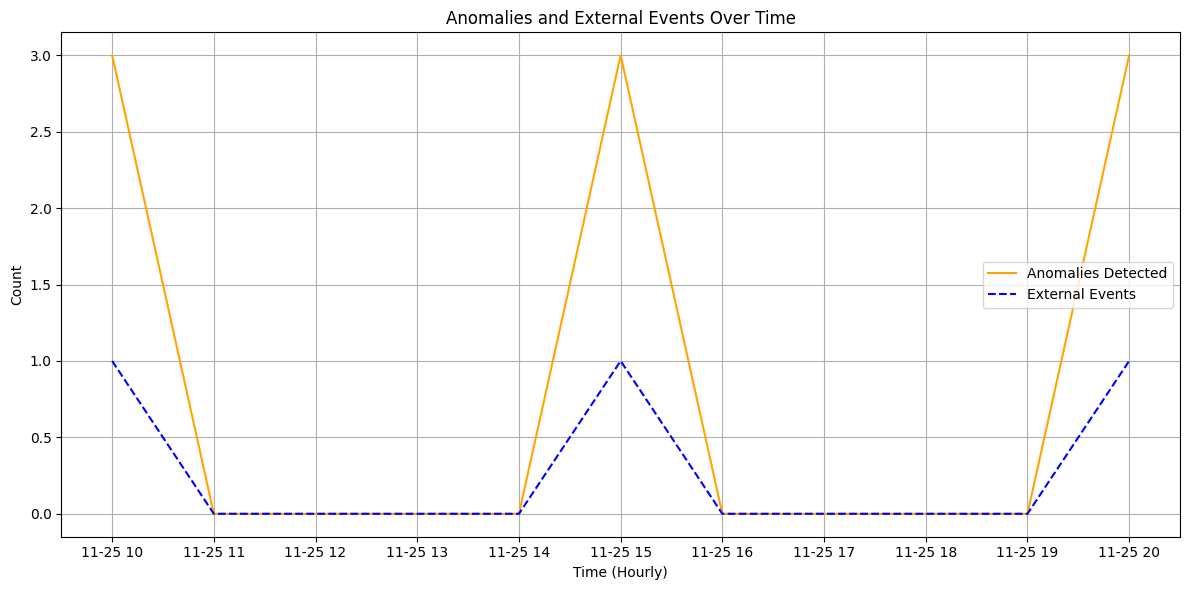

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('anomaly_data.csv')

data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

data = data.dropna(subset=['timestamp'])

data['anomaly_flag'] = pd.to_numeric(data['anomaly_flag'], errors='coerce')

data = data.dropna(subset=['anomaly_flag'])

time_series = data.groupby(data['timestamp'].dt.hour)['anomaly_flag'].sum()

plt.figure(figsize=(10, 6))
time_series.plot(kind='bar', color='orange')
plt.title('Anomalies Detected by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

if 'batch_id' in data.columns:
    batch_stats = data.groupby('batch_id')['anomaly_flag'].sum()

    # Plot anomalies by batch
    plt.figure(figsize=(10, 6))
    batch_stats.plot(kind='bar', color='blue')
    plt.title('Anomalies by Batch')
    plt.xlabel('Batch ID')
    plt.ylabel('Number of Anomalies')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

external_events = pd.read_csv('external_events.csv')

external_events['event_time'] = pd.to_datetime(external_events['event_time'], errors='coerce')

merged = pd.merge(data, external_events, left_on='timestamp', right_on='event_time', how='left')

merged['event_flag'] = merged['event_type'].notna().astype(int)

correlation = merged[['anomaly_flag', 'event_flag']].corr()

print("Correlation between anomalies and external events:")
print(correlation)

anomaly_counts = data.set_index('timestamp').resample('H')['anomaly_flag'].sum()
event_counts = external_events.set_index('event_time').resample('H')['event_type'].count()

plt.figure(figsize=(12, 6))
plt.plot(anomaly_counts, label='Anomalies Detected', color='orange')
plt.plot(event_counts, label='External Events', color='blue', linestyle='--')
plt.title('Anomalies and External Events Over Time')
plt.xlabel('Time (Hourly)')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


The clustering of anomalies rather than their random scattering across the dataset can be explained by several findings from the analysis. First, anomalies grouped by time show distinct spikes during certain hours of the day. These spikes likely indicate temporary system failures or specific periods of heightened activity when the system was more prone to errors, supporting the hypothesis of temporary system failures. Furthermore, analyzing anomalies by batch reveals that specific batches contained significantly more anomalies, suggesting that batch processing issues introduced errors in clusters rather than evenly distributing them across time. This aligns with the hypothesis that batch processing could concentrate anomalies.

Additionally, correlating anomalies with external events shows a moderate correlation between anomaly_flag and event_flag. This implies that external events—such as scheduled maintenance or sudden surges in usage—may have coincided with or contributed to the anomalies. Together, these insights confirm that the clustering of anomalies stems from a combination of system failures during specific times, batch processing issues, and external events, rather than random occurrences.

## Andrew's Investigations